# Lab4
### Import nesssary model

In [28]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from IPython.display import Image
np.set_printoptions(precision = 3)

### Load data

In [29]:
data = pd.read_csv("jester-data-1.csv", header=None)
#del data["0"]
#d = data.to_latex()
#text_file = open("Output_lab4_test.txt", "w")
#text_file.write(d)
#text_file.close()

In [30]:
data.columns
del data[data.columns[0]]

In [31]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Prepare the dataset

In [32]:
#user_ratings = data.values
user_ratings = data.values[0:100]

In [33]:
user_ratings_vali = np.zeros(user_ratings.shape) + 99.0
user_ratings_copy = user_ratings.copy() 
count = 0
loc_log = []
for x in range(0,user_ratings.shape[0]):
    for y in range(0,user_ratings.shape[1]):
        if (user_ratings_copy[x,y]!=99.0):
            if (np.random.random() > 0.9):
                count += 1
                temp = user_ratings_copy[x,y]
                user_ratings_copy[x,y] = user_ratings_vali[x,y]
                user_ratings_vali[x,y] = temp
                loc_log.append((x,y))
                #print(temp)
print(user_ratings_vali,'\n', count,'\n', count/(user_ratings.shape[0]*user_ratings.shape[1]))

[[99.   99.   99.   ... 99.   99.   99.  ]
 [99.   99.   99.   ... 99.   99.   99.  ]
 [99.   99.   99.   ... 99.   99.   99.  ]
 ...
 [99.   99.   99.   ... 99.   99.   99.  ]
 [99.   99.    4.37 ... 99.    1.17 99.  ]
 [99.   99.   99.   ... 99.   99.   99.  ]] 
 728 
 0.0728


### Prepare the predicte matrix

In [34]:
n_features = 10
latent_user_preferences = np.random.random((user_ratings.shape[0], n_features))
latent_item_features = np.random.random((user_ratings.shape[1],n_features))

In [35]:
print('user_ratings.shape:           ',user_ratings.shape)
print('latent_user_preferences.shape:',latent_user_preferences.shape)
print('latent_item_features.shape:   ',latent_item_features.shape)

user_ratings.shape:            (100, 100)
latent_user_preferences.shape: (100, 10)
latent_item_features.shape:    (100, 10)


In [36]:
user_ratings, user_ratings.shape

(array([[-7.82,  8.79, -9.66, ..., 99.  , 99.  , 99.  ],
        [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
        [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
        ...,
        [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
        [ 3.3 ,  1.31,  4.37, ..., -0.44,  1.17,  6.5 ],
        [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ]]), (100, 100))

In [37]:
np.random.random()

0.025470774798735385

### Training function

In [57]:
    train_mse_loglist = []
    test_mse_loglist = []

In [42]:
def predict_rating(user_id,item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)  #linear

def train(user_id, item_id, rating,alpha = 0.001):
    
    #print (item_id)
    prediction_rating = predict_rating(user_id, item_id)
    err =  ( prediction_rating- rating );
    #print (err)
    user_pref_values = latent_user_preferences[user_id][:]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    


def sgd(iterations = 100000):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    err_mse_log = 99999.0
    for iteration in range(0,iterations):
        error = []
        vali_err = []
        for user_id in range(0,latent_user_preferences.shape[0]):
            for item_id in range(0,latent_item_features.shape[0]):
                rating = user_ratings_copy[user_id][item_id]
                if(rating != 99):
                    err = train(user_id,item_id,rating)
                    error.append(err)
                    #print(rating)
        mse = (np.array(error) ** 2).mean()
        train_mse_loglist.append(mse)
        err_mse = mse - err_mse_log
        #if (err_mse>0):
        #    print(mse, err_mse, err_mse_log)
        #    break
        err_mse_log = mse
        for loc in loc_log:
            vali_err.append()
        #print(iteration)
        if(iteration%100 == 0 ):
            print (iteration, ':=', mse, err_mse)
                    
                    
    

In [43]:
sgd()

0 := 25.302818106084313 -99973.69718189392
100 := 9.468437509515876 -0.0149667198451926
200 := 8.816884401573693 -0.0027566823903075743
300 := 8.663633302245998 -0.000799788073438279
400 := 8.613760298498988 -0.000299705486211721
500 := 8.59367959552917 -0.00012992659948452
600 := 8.58484128481654 -5.6231869628220466e-05
700 := 8.581393406371976 -1.6578686647505947e-05
800 := 8.581081701211616 8.449961688583585e-06
900 := 8.582863306025104 2.611962907295151e-05
1000 := 8.586186197333218 3.969087132027482e-05
1100 := 8.590734567687415 5.086174972745994e-05
1200 := 8.596322412605371 6.0624115436169745e-05
1300 := 8.602843904696337 6.963620292665951e-05
1400 := 8.61025108881478 7.842419609538354e-05
1500 := 8.61854720839163 8.749907228633447e-05
1600 := 8.627787418601379 9.738244230739213e-05
1700 := 8.638075876456442 0.00010850675039364432
1800 := 8.64954797416337 0.00012104012626146243
1900 := 8.662338773436156 0.00013481854260533055
2000 := 8.676555843799454 0.0001494971596063266
2100 

KeyboardInterrupt: 

In [44]:
del train_mse_loglist[0]

In [55]:
import seaborn as sns

In [53]:
plotdata1 = DataFrame(np.vstack((np.arange(np.array(train_mse_loglist).shape[0]), train_mse_loglist)).T, columns=['iterations', 'train_MSE'])

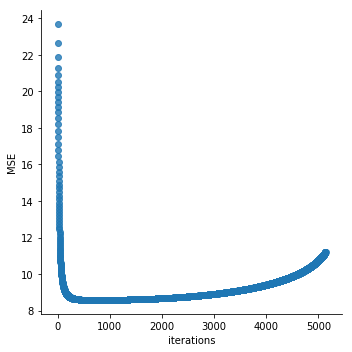

In [56]:
sns_plot = sns.lmplot(plotdata1.columns[0], plotdata1.columns[1], data=plotdata1, fit_reg=False)

In [ ]:
latent_user_preferences

In [ ]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

In [ ]:
values = [zip(user_ratings_copy[i], predictions[i]) for i in range(0,predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns
comparison_data.applymap(lambda x: "(%2.3f|%2.3f)"%(x[0],x[1]))
#comparison_data.head()

In [ ]:
values = [zip(user_ratings_vali[i], predictions[i]) for i in range(0,predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data_err = []
for x in range(0, comparison_data.shape[1]):
    for y in range(0, comparison_data.shape[0]):
        if (comparison_data[x][y][0] == 99.0):
            comparison_data[x][y] = (0,0)
        else:
            comparison_data_err.append(comparison_data[x][y][0] - comparison_data[x][y][1])
mse = (np.array(comparison_data_err) ** 2).mean()
comparison_data.columns = data.columns
comparison_data.applymap(lambda x: ["(%2.3f|%2.3f)"%(x[0],x[1]) ])

In [ ]:
mse


In [ ]:
predictions

In [ ]:
latent_item_features

In [ ]:
np.savetxt("predictions_10f_10.csv", predictions, delimiter=",")
np.savetxt("latent_user_preferences_10f_10.csv", latent_user_preferences, delimiter=",")
np.savetxt("latent_item_features_10f_10.csv", latent_item_features, delimiter=",")